In [9]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 300

## Time_id

In [2]:
df = pd.read_feather('train.feather').set_index('row_id')
df

,time_id,investment_id,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,...,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
row_id,,,,,,,,,,,,,,,,,,,,,
0_1,0,1,-0.300875,0.932573,0.113691,-0.402206,0.378386,-0.203938,-0.413469,0.965623,...,0.366028,-1.095620,0.200075,0.819155,0.941183,-0.086764,-1.087009,-1.044826,-0.287605,0.321566
0_2,0,2,-0.231040,0.810802,-0.514115,0.742368,-0.616673,-0.194255,1.771210,1.428127,...,-0.154193,0.912726,-0.734579,0.819155,0.941183,-0.387617,-1.087009,-0.929529,-0.974060,-0.343624
0_6,0,6,0.568807,0.393974,0.615937,0.567806,-0.607963,0.068883,-1.083155,0.979656,...,-0.138020,0.912726,-0.551904,-1.220772,-1.060166,-0.219097,-1.087009,-0.612428,-0.113944,0.243608
0_7,0,7,-1.064780,-2.343535,-0.011870,1.874606,-0.606346,-0.586827,-0.815737,0.778096,...,0.382201,0.912726,-0.266359,-1.220772,0.941183,-0.609113,0.104928,-0.783423,1.151730,-0.773309
0_8,0,8,-0.531940,0.842057,-0.262993,2.330030,-0.583422,-0.618392,-0.742814,-0.946789,...,-0.170365,0.912726,-0.741355,-1.220772,0.941183,-0.588445,0.104928,0.753279,1.345611,-0.737624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219_3768,1219,3768,0.033600,0.093530,-0.720275,-0.345497,-0.438781,-0.166972,-0.437182,1.475746,...,-0.285908,-1.232434,-0.660579,0.875537,0.421628,-0.428097,-0.075548,-0.533092,-0.193732,-0.581394
1219_3769,1219,3769,-0.223264,-1.344935,-0.199987,-0.107702,-0.454677,-0.221914,-0.141174,-1.498235,...,0.184517,-1.232434,-0.670493,0.875537,0.421628,-0.729949,-1.514277,0.013145,-0.890270,-0.589705
1219_3770,1219,3770,-0.559415,0.979489,-1.110491,1.006980,-0.467307,-0.159549,1.355671,0.150812,...,-0.756332,-1.232434,0.820784,-1.142157,0.421628,-0.363329,1.363181,-0.079106,-1.580124,-0.297625


In [12]:
def downcast_numbers(df):
    df = df.select_dtypes(include=[np.number]).apply(pd.to_numeric, downcast='signed')
    df = df.select_dtypes(include=[np.number]).apply(pd.to_numeric, downcast='unsigned')
    df[df.columns] = df
    return df

In [14]:
df.dtypes

time_id           uint16
investment_id     uint16
target           float32
f_0              float32
f_1              float32
                  ...   
f_295            float32
f_296            float32
f_297            float32
f_298            float32
f_299            float32
Length: 303, dtype: object

In [3]:
print('Number of Unique Indices: ', df.index.nunique())
print('Number of Unique Items in Time Id: ', df.time_id.nunique())

print('Number of Rows and Columns: ', df.shape)
print('Number of Investment Ids: ', df.investment_id.nunique())
print('Percentage of Null values: ', df.isnull().mean().mean())

print('Range from Target: ', df.target.agg([np.min, np.max, np.mean, np.median, np.std]))


Number of Unique Indices:  3141410
Number of Unique Items in Time Id:  1211
Number of Rows and Columns:  (3141410, 303)
Number of Investment Ids:  3579
Percentage of Null values:  0.0
Range from Target:  amin      -9.419646
amax      12.038613
mean      -0.021092
median    -0.097170
std        0.919706
Name: target, dtype: float64


In [4]:
print('Size before reduction: ', df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3141410 entries, 0_1 to 1219_3773
Columns: 303 entries, time_id to f_299
dtypes: float64(301), int64(2)
memory usage: 7.2+ GB
Size before reduction:  None


In [5]:
int_columns = df.select_dtypes(int).columns 
df[int_columns] = df[int_columns].astype('int16')

float_columns = df.select_dtypes(float).columns 
df[float_columns] = df[float_columns].astype('float32')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3141410 entries, 0_1 to 1219_3773
Columns: 303 entries, time_id to f_299
dtypes: float32(301), int16(2)
memory usage: 3.6+ GB


In [11]:
data_types = df.dtypes.astype('str').to_dict()

with open('data_types_dict.pkl', 'wb') as f:
    pickle.dump(data_types,f)

## Target

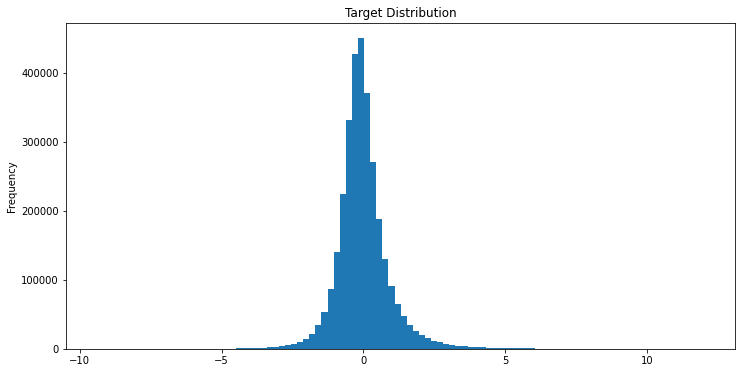

In [6]:
df.target.plot(kind = 'hist', bins = 100, figsize = (12,6), title = 'Target Distribution');

## Investment_id by time

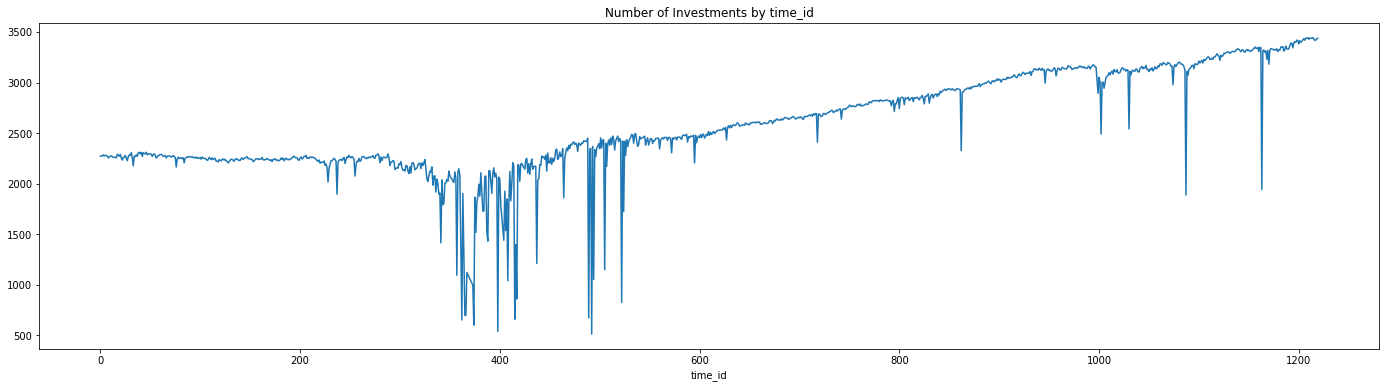

In [7]:
df.groupby(['time_id']).investment_id.size().plot(figsize = (24,6), title = 'Number of Investments by time_id');

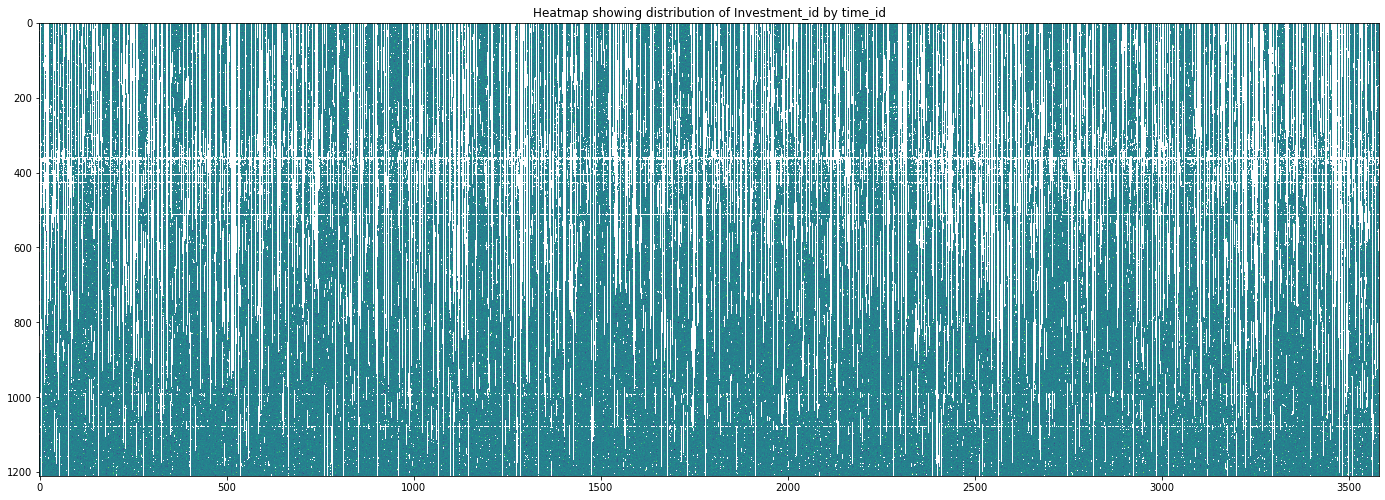

In [8]:
data = df.groupby(['time_id', 'investment_id']).target.sum().unstack(level = 1)
plt.figure(figsize=(24,12))
plt.imshow(data, cmap='viridis', interpolation='nearest')
plt.title('Heatmap showing distribution of Investment_id by time_id')
plt.show()

## Statistics for every variable

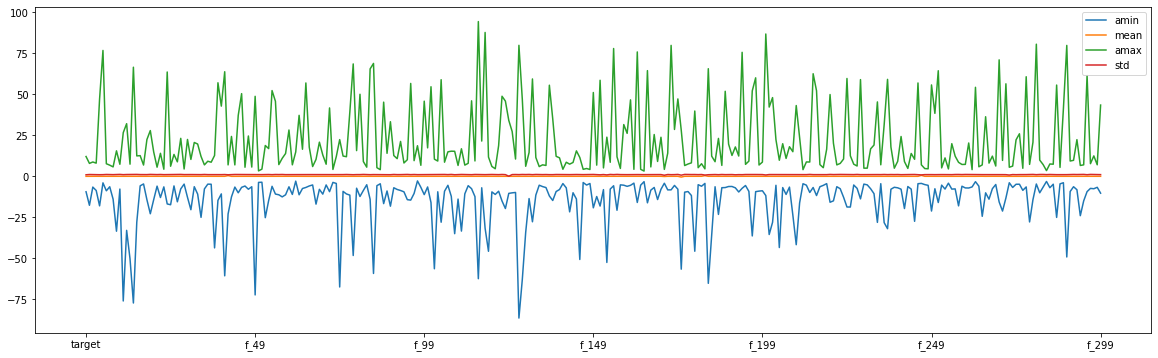

In [9]:
df.drop(columns = ['time_id', 'investment_id']).agg([np.min, np.mean, np.max, np.std]).T.plot(figsize = (20,6));